# Iris

## Step 1: Preprocess the Data

In [0]:
import pandas as pd
dataset = pd.read_csv('iris.csv')

In [2]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

In [0]:
y_train = x_train.pop('species')
y_test = x_test.pop('species')

In [6]:
y_train

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
          ...    
38         setosa
5          setosa
53     versicolor
143     virginica
105     virginica
Name: species, Length: 105, dtype: object

In [0]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [9]:
y_train

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0,

In [10]:
lb.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Step 2: Build the NN Model

In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=[4]))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(3, activation='softmax'))

## Step 3: Compile Model

In [0]:
model.compile(
    loss='categorical_crossentropy', # measures difference between probability distribution
    optimizer='adam',
    metrics=['accuracy'])

## Step 4: Train Model

In [15]:
history = model.fit(x_train,y_train,
                    epochs=200, 
                    validation_split = 0.3)

Epoch 1/200
3/3 [==============================] - 0s 71ms/step - loss: 1.0699 - accuracy: 0.4110 - val_loss: 1.0410 - val_accuracy: 0.5000
Epoch 2/200
3/3 [==============================] - 0s 11ms/step - loss: 1.0250 - accuracy: 0.6849 - val_loss: 1.0048 - val_accuracy: 0.5312
Epoch 3/200
3/3 [==============================] - 0s 10ms/step - loss: 0.9803 - accuracy: 0.6712 - val_loss: 0.9680 - val_accuracy: 0.5312
Epoch 4/200
3/3 [==============================] - 0s 14ms/step - loss: 0.9480 - accuracy: 0.6986 - val_loss: 0.9191 - val_accuracy: 0.7188
Epoch 5/200
3/3 [==============================] - 0s 10ms/step - loss: 0.9056 - accuracy: 0.8630 - val_loss: 0.8694 - val_accuracy: 0.7188
Epoch 6/200
3/3 [==============================] - 0s 11ms/step - loss: 0.8491 - accuracy: 0.8493 - val_loss: 0.8187 - val_accuracy: 0.6562
Epoch 7/200
3/3 [==============================] - 0s 11ms/step - loss: 0.8003 - accuracy: 0.7808 - val_loss: 0.7559 - val_accuracy: 0.6250
Epoch 8/200
3/3 [===

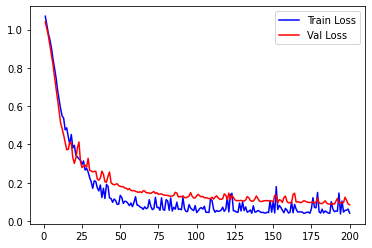

In [16]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Val Loss')
plt.legend()
plt.show()

## Step 5: Evaluate Model

In [17]:
loss,accuracy = model.evaluate(x_test,y_test)
loss,accuracy

2/2 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9556


(0.06560789048671722, 0.9555555582046509)

## Step 6: Saving Model

In [0]:
model.save("iris.h5")

## Step 7: Load Model & Predict

In [19]:
y_pred = model.predict(x_test)
y_pred

array([[9.99980211e-01, 1.97435947e-05, 5.06192039e-14],
       [9.99930739e-01, 6.92246758e-05, 1.19862865e-12],
       [9.99995708e-01, 4.31635863e-06, 9.27515900e-16],
       [9.99991059e-01, 8.89552484e-06, 5.97420766e-15],
       [9.99983072e-01, 1.68826482e-05, 2.50680993e-14],
       [9.99845028e-01, 1.55001893e-04, 3.46587429e-12],
       [9.99844313e-01, 1.55615417e-04, 6.79420105e-12],
       [9.99968410e-01, 3.16162477e-05, 1.50690102e-13],
       [9.99943137e-01, 5.68305259e-05, 7.01975370e-13],
       [9.99927044e-01, 7.29944004e-05, 7.15275387e-13],
       [9.99998093e-01, 1.88811487e-06, 1.61037758e-16],
       [9.99930739e-01, 6.92246758e-05, 1.19862865e-12],
       [9.99952197e-01, 4.77956419e-05, 5.20505676e-13],
       [9.99974370e-01, 2.56361200e-05, 8.12803804e-14],
       [9.99967933e-01, 3.20713589e-05, 1.53936990e-13],
       [9.99956131e-01, 4.38359166e-05, 4.48432741e-13],
       [9.99960542e-01, 3.94055169e-05, 2.85878228e-13],
       [2.22837582e-04, 9.97221

In [20]:
y_pred.argmax(axis = 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [0]:
record = [[5.1,3.5,1.4,0.2]]
scaled = sc.transform(record)

In [22]:
from tensorflow.keras.models import load_model
model = load_model('iris.h5')

In [0]:
y_pred = model.predict(scaled)

In [24]:
y_pred

array([[9.9998021e-01, 1.9743577e-05, 5.0619197e-14]], dtype=float32)

In [25]:
y_pred.argmax()

0

# Mnist

In [26]:
# Step 1:Load the Data
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [27]:
x_train.shape

(60000, 28, 28)

In [0]:
# x_train[0]

In [29]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [31]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [33]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
# Step 2: Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Step 3: Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
# Step 4: Train the Model
history = model.fit(x_train,y_train,
          epochs=10,
          shuffle = True,
          validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3401 - accuracy: 0.9027 - val_loss: 0.1902 - val_accuracy: 0.9449
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1533 - accuracy: 0.9539 - val_loss: 0.1575 - val_accuracy: 0.9524
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1112 - accuracy: 0.9679 - val_loss: 0.1229 - val_accuracy: 0.9626
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0876 - accuracy: 0.9731 - val_loss: 0.1394 - val_accuracy: 0.9607
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0696 - accuracy: 0.9789 - val_loss: 0.1199 - val_accuracy: 0.9653
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0586 - accuracy: 0.9816 - val_loss: 0.1305 - val_accuracy: 0.9631
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0492 - accuracy: 0.9841 - val_loss: 0.1215 - val_accuracy:

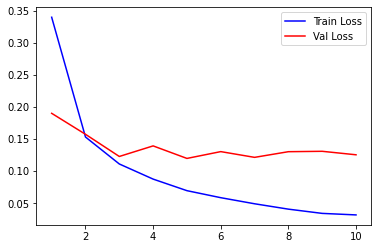

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Val Loss')
plt.legend()
plt.show()

In [39]:
# Step 5: Evaluate the Model
loss,accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1027 - accuracy: 0.9719


In [40]:
loss,accuracy

(0.10271056741476059, 0.9718999862670898)

In [0]:
# Step 6: Save the Model
model.save('mnist_nn.h5')

### Predict batch images

In [42]:
y_pred = model.predict(x_test)
y_pred

array([[3.8580769e-08, 2.0356004e-09, 8.7359094e-06, ..., 9.9673128e-01,
        4.2941707e-07, 9.9183933e-05],
       [6.6408719e-11, 7.7127356e-07, 9.9999928e-01, ..., 1.4768136e-14,
        3.3403244e-10, 4.6565332e-17],
       [1.0269811e-05, 9.9952662e-01, 2.4850327e-05, ..., 3.7043710e-04,
        5.2694861e-05, 4.5023216e-06],
       ...,
       [1.7455476e-12, 1.9017863e-13, 3.5877331e-14, ..., 4.3505395e-07,
        1.0101882e-07, 1.8182150e-04],
       [6.5694092e-13, 1.1229346e-11, 5.4688328e-16, ..., 1.0937458e-12,
        6.2383145e-07, 1.2030785e-09],
       [9.3774658e-12, 1.1910012e-13, 2.1457794e-10, ..., 7.8838626e-18,
        4.7471699e-15, 1.4574684e-16]], dtype=float32)

In [43]:
y_pred.argmax(axis = 1)

array([7, 2, 1, ..., 4, 5, 6])

### Predict Single Image

In [0]:
x_single = x_test[0]

In [45]:
x_single.shape

(28, 28)

In [0]:
# pred = model.predict(x_single)

In [0]:
import numpy as np
x_single = np.expand_dims(x_single, 0)

In [48]:
x_single.shape

(1, 28, 28)

In [0]:
pred = model.predict(x_single)

In [50]:
pred

array([[3.8580698e-08, 2.0355926e-09, 8.7359012e-06, 3.1588960e-03,
        2.7926232e-13, 1.3789064e-06, 6.7432187e-16, 9.9673128e-01,
        4.2941582e-07, 9.9183839e-05]], dtype=float32)

In [51]:
pred.argmax(axis=1)

array([7])

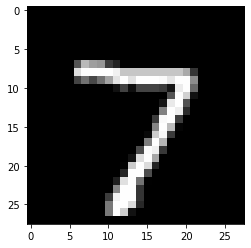

In [52]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0], cmap='gray')